# Lorenz Equations

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D

In [2]:
%matplotlib notebook

We'll write a function that implements the Lorenz equations. Let $\sigma = 10$, $\rho = 28$, $\beta = 8$ . We'll make a 3D plot of a solution to the Lorenz equations for an initial condition where $(x, y, z)$ are drawn randomly from a uniform distribution from −15 to 15. I'll use `scipy .integrate.odeint` to compute the solution.

In [3]:
def lorenz(x,t):
    """Implements Lorenz equations:
    
    ∂x/∂t = σ(y − x)
    ∂y/∂t = ρx − y − xz
    ∂z/∂t = xy − βz
        
    Parameters:
        x ((3,) ndarray): The state values (x,y,z)
        t (float): The time value t
    Returns:
        ((3,) ndarray): The derivative values
    """
    dx = sigma*(x[1]-x[0])
    dy = row*x[0]-x[1]-x[0]*x[2]
    dz = x[0]*x[1]-beta*x[2]
    return [dx,dy,dz]

<IPython.core.display.Javascript object>


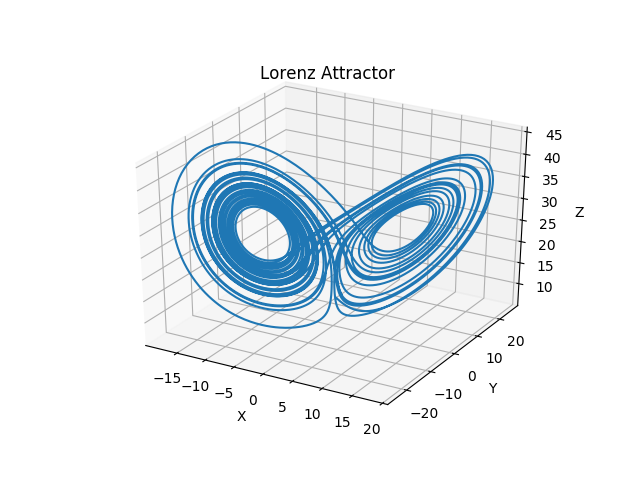

In [4]:
#initialize values
sigma,row,beta = 10,28,8/3
t = np.linspace(-15,15,8000)
#draw from a uniform distribution, and solve the ode
solution = odeint(lorenz,np.random.uniform(-15,15,3),t)
#plot the results
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Lorenz Attractor")
plt.plot(solution[:,0],solution[:,1],solution[:,2])
plt.show()

To better visualize the Lorenz attractor, I'll produce a single 3D plot displaying three solutions to the Lorenz equations, each with random initial conditions.

<IPython.core.display.Javascript object>


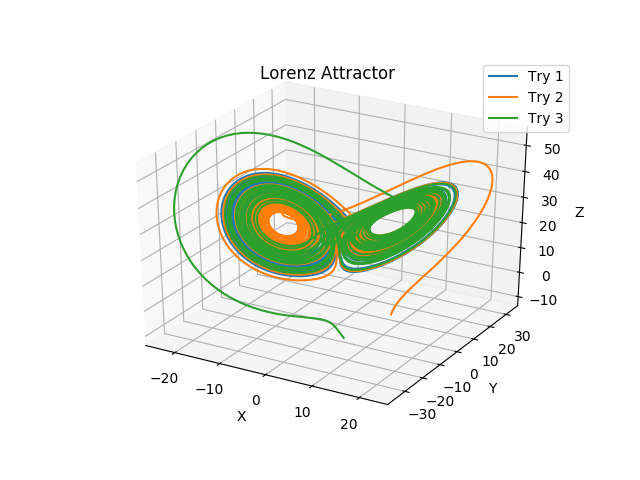

In [5]:
#Copying code from part 1:
#initialize values
sigma,row,beta = 10,28,8/3
t = np.linspace(-15,15,8000)
#try 1: draw from a uniform distribution, and solve the ode
solution1 = odeint(lorenz,np.random.uniform(-15,15,3),t)
#try 2: draw from a uniform distribution, and solve the ode
solution2 = odeint(lorenz,np.random.uniform(-15,15,3),t)
#try 3: draw from a uniform distribution, and solve the ode
solution3 = odeint(lorenz,np.random.uniform(-15,15,3),t)
#plot the results
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Lorenz Attractor")
plt.plot(solution1[:,0],solution1[:,1],solution1[:,2],label='Try 1')
plt.plot(solution2[:,0],solution2[:,1],solution2[:,2],label='Try 2')
plt.plot(solution3[:,0],solution3[:,1],solution3[:,2],label='Try 3')
plt.legend(loc='best')
plt.show()

I'll use `matplotlib.animation.FuncAnimation` to produce a 3D animation of two solutions to the Lorenz equations with similar initial conditions. To make similar initial conditions, draw $(x_1,y_1,z_1)$ randomly as before, and then produce $(x_2,y_2,z_2)$ by adding a small perturbation: `np.random.randn(3)*(1e-10)`. It will take several seconds before the separation between the two solutions will be noticeable.

The animation should have a point marker and the past trajectory curve for each solution. I'll save the animation as `lorenz_animation1.mp4`.

In [6]:
def updateLorenz(i):
    #at each instance, update the first solution's particle & trajectory
    sol1Particle.set_data(solution1[i,0],solution1[i,1])
    sol1Particle.set_3d_properties(solution1[i,2])
    sol1Traj.set_data(solution1[:i+1,0],solution1[:i+1,1])
    sol1Traj.set_3d_properties(solution1[:i+1,2])
    #at each instance, update the perturbation solution's particle & trajectory
    sol2Particle.set_data(solution2[i,0],solution2[i,1])
    sol2Particle.set_3d_properties(solution2[i,2])
    sol2Traj.set_data(solution2[:i+1,0],solution2[:i+1,1])
    sol2Traj.set_3d_properties(solution2[:i+1,2])

In [23]:
#initialize values
sigma,row,beta = 10,28,8/3
t = np.linspace(-15,15,10000)
#draw from a uniform distribution, and solve the ode
y0=np.random.uniform(-15,15,3)
solution1 = odeint(lorenz,y0,t)
solution2 = odeint(lorenz,y0+np.random.randn(3)*1e-7,t)
#plot the results
plt.ioff()
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_xlim(-35,35)
ax.set_ylim(-35,35)
ax.set_zlim(-35,35)
plt.title("Lorenz Attractor with Perturbation")
#prepare the plot to accept updated values
sol1Particle, = plt.plot([],[],[],label='Try 1',ms=10,marker='o',color='red')
sol1Traj, = plt.plot([],[],[],color='red',alpha=0.5)
sol2Particle, = plt.plot([],[],[],label='Perturbation',ms=10,marker='o',color='gray')
sol2Traj, = plt.plot([],[],[],color='gray',alpha=0.5)
#run the animation
#plt.rcParams['animation.ffmpeg_path'] = 'C:/Users/wesse/Documents/ACME/ffmpeg-4.0.2.tar'
ani=animation.FuncAnimation(fig,updateLorenz,frames=range(0,len(t),5),interval=10)
ani.save('lorenz_animation1.mp4',writer='ffmpeg')
#plt.show()

<video src='lorenz_animation1.mp4' controls>

The `odeint` function allows users to specify error tolerances (similar to setting a value of $h$ for a Runge-Kutta method). Using a single random initial condition, produce two approximations by using the odeint arguments `(atol=1e-14, rtol=1e-12)` for the first approximation and `(atol=1e-15, rtol=1e-13)` for the second.

In [34]:
#initialize values
sigma,row,beta = 10,28,8/3
t = np.linspace(0,40,10000)
#draw from a uniform distribution, and solve the ode
y0 = np.random.randn(3)
solution1 = odeint(lorenz,y0,t,atol=1e-13,rtol=1e-11)
solution2 = odeint(lorenz,y0,t,atol=1e-15,rtol=1e-13)
#plot the results
plt.ioff()
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_xlim(-35,35)
ax.set_ylim(-35,35)
ax.set_zlim(-35,35)
plt.title("Lorenz Attractor with RK Perturbation")
#prepare the plot to accept updated values
sol1Particle, = plt.plot([],[],[],label='Try 1',ms=10,marker='o',color='red')
sol1Traj, = plt.plot([],[],[],color='red',alpha=0.5)
sol2Particle, = plt.plot([],[],[],label='Perturbation',ms=10,marker='o',color='gray')
sol2Traj, = plt.plot([],[],[],color='gray',alpha=0.5)
#run the animation
ani=animation.FuncAnimation(fig,updateLorenz,frames=range(0,len(t),30),interval=40)
ani.save('lorenz_animation2.mp4',writer='ffmpeg')
#plt.show()

<video src='lorenz_animation2.mp4' controls>

I will estimate the Lyapunov exponent of the Lorenz equations by doing the following:
* Produce an initial condition that already lies on the attractor. This can be done by picking a random initial condition, and then solving the system forward in time for a while.
* Produce a second initial condition by adding a small perturbation: `np.random.randn(3)*(1e-10)`.
* For both initial conditions, use odeint to produce approximate solutions for $0 \leq t \leq 10$.
* Compute $||\delta(t)||$ by taking the norm of the difference between the two approximate solutions.
* Use `scipy.stats.linregress` to calculate a best-fit line for $\log(||\delta(t)||)$ against $t$.
* The slope of the resulting best-fit line is an approximation of the Lyapunov exponent $\lambda$.

<IPython.core.display.Javascript object>


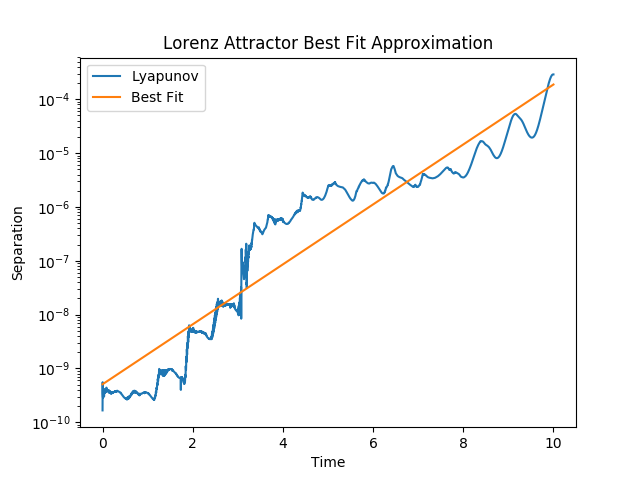

In [52]:
#initialize values
sigma,row,beta = 10,28,8/3
t = np.linspace(0,10,5000)
#draw from a uniform distribution, and solve the ode
y0 = np.random.randn(3)
solution1 = odeint(lorenz,y0,t)
#get the initial values
s1 = [solution1[2000,0],solution1[2000,1],solution1[2000,2]]
#Copying code from problem 1:
#initialize values
sigma,row,beta = 10,28,8/3
t = np.linspace(0,10,8000)
#try 1: get the computed initial value, and solve the ode
solution1 = odeint(lorenz,s1,t)
#try 2: get the perturbation initial value, and solve the ode
solution2 = odeint(lorenz,s1+np.random.randn(3)*(1e-10),t)
#get the norm
delta = np.linalg.norm((solution1-solution2),axis=1)
#calculate the best fit line against t
bestfit = stats.linregress(t,np.log(delta))
#plot the results
fig = plt.figure()
plt.xlabel("Time")
plt.ylabel("Separation")
plt.title("Lorenz Attractor Best Fit Approximation")
plt.semilogy(t,delta,label='Lyapunov')
plt.semilogy(t,np.exp(bestfit[0]*t+bestfit[1]),label='Best Fit')
plt.legend(loc='best')
plt.show()